/home/murray/sdr-config/sdr/lib/python3.10/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


Keys in the file: ['received', 'transmit']


/home/murray/sdr-config/sdr/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/murray/sdr-config/sdr/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


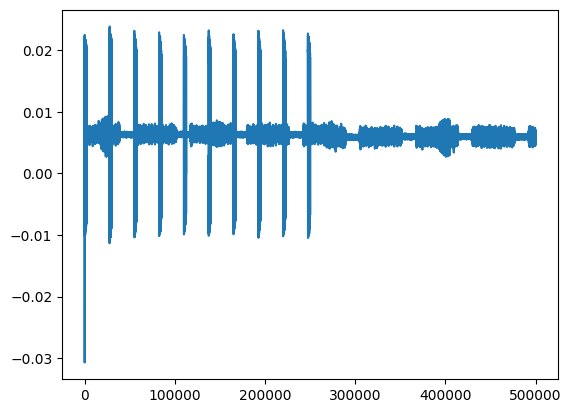

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the .h5 file
file_path = '/home/murray/sdr-config/murray_tests/murray_long_test/long_test.h5'
with h5py.File(file_path, 'r') as file:
    # List all groups in the file
    print("Keys in the file:", list(file.keys()))
    
    # Access the datasets
    received_dataset_name = 'received'  # Replace with actual name
    transmitted_dataset_name = 'transmit'  # Replace with actual name
    
    # Extract data
    received_data = file[received_dataset_name][()]
    transmitted_data = file[transmitted_dataset_name][()]
    
    # Separate real and imaginary parts
    received_real_data = np.real(received_data)
    received_imag_data = np.imag(received_data)

    # Separate real and imaginary parts
    transmitted_real_data = np.real(transmitted_data)
    transmitted_imag_data = np.imag(transmitted_data)


interleaved_received = np.empty((received_real_data.size), dtype=np.complex128)

for i in range(0,received_real_data.size):
    interleaved_received[i] = received_real_data[i] + 1j*received_imag_data[i]


interleaved_transmitted = np.empty((transmitted_real_data.size),dtype=np.complex128)

for i in range(0,transmitted_real_data.size):
    interleaved_transmitted[i] = transmitted_real_data[i] + 1j*transmitted_imag_data[i]

fs = 25e6
fft_data = np.fft.fft(received_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)
#plt.plot(fft_freq_axis,20*np.log10(abs(fft_data)))
plt.plot(received_data)
plt.show()



/home/murray/sdr-config/sdr/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/murray/sdr-config/sdr/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


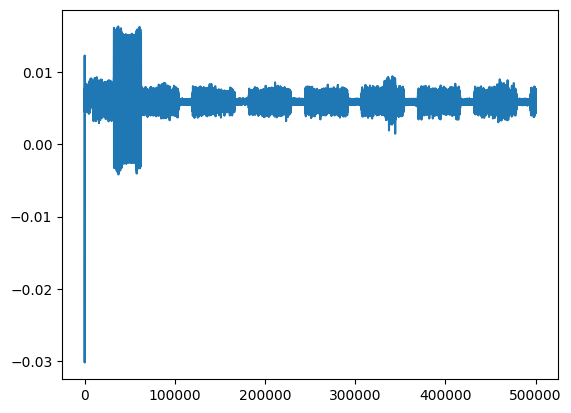